<a href="https://colab.research.google.com/github/steve-keys/Assignment---1--Intro-to-Programming/blob/main/Copy_of_amazon_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kora -q

'''load packages'''

from bs4 import BeautifulSoup
from kora.selenium import wd

     |████████████████████████████████| 57 kB 3.3 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 


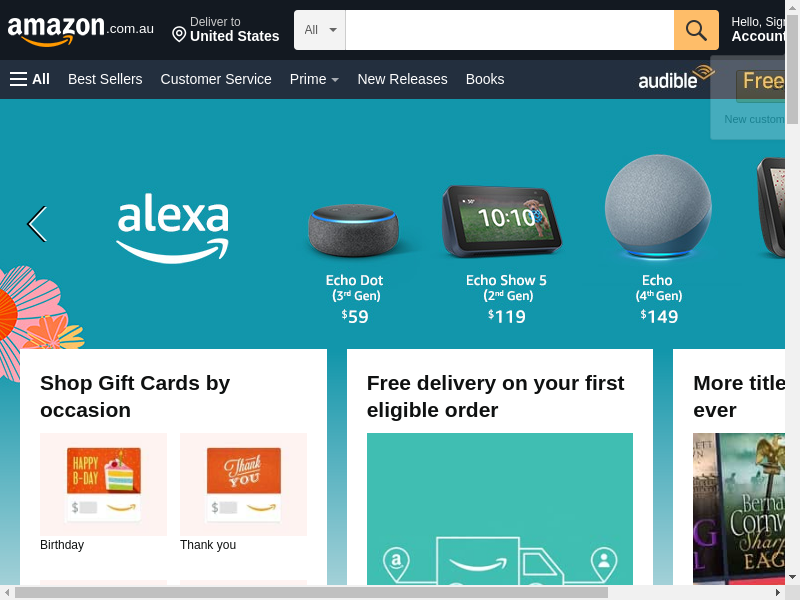

In [2]:
# Establish Session
url = 'https://www.amazon.com.au'
wd.get(url)
wd

In [3]:
# Work out the URL pattern
template = 'https://www.amazon.com.au/s?k={}&rh=n%3A4913312051&ref=nb_sb_noss'

#search_term = 'ultrawide monitor'
search_term = input("What do you want to search for? ")

# replace spaces with a '+' SIGN
search_term = search_term.replace(' ','+')

url = template.format(search_term)
url

What do you want to search for? ultrawide monitor


'https://www.amazon.com.au/s?k=ultrawide+monitor&rh=n%3A4913312051&ref=nb_sb_noss'

What do you want to search for? ultrawide monitor


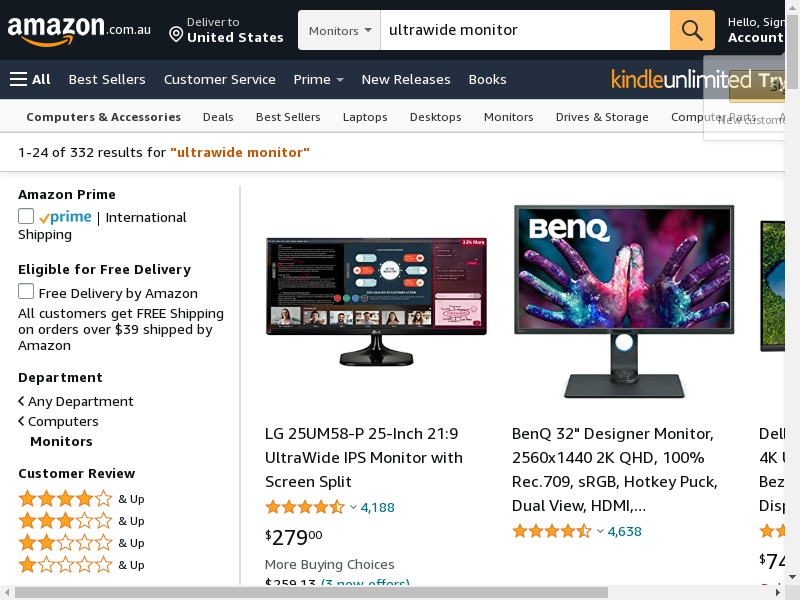

In [4]:
search_term = input("What do you want to search for? ")
template = 'https://www.amazon.com.au/s?k={}&rh=n%3A4913312051&ref=nb_sb_noss'
search_term = search_term.replace(' ','+')
url = template.format(search_term)
wd.get(url)
wd

In [5]:
search_term = input("What do you want to search for? ")
template = 'https://www.amazon.com.au/s?k={}&rh=n%3A4913312051&ref=nb_sb_noss'
search_term = search_term.replace(' ','+')
url = template.format(search_term)
wd.get(url)

What do you want to search for? ultrawide monitor


In [6]:
def get_url():
  search_term = input("What do you want to search for? ")
  template = 'https://www.amazon.com.au/s?k={}&rh=n%3A4913312051&ref=nb_sb_noss'
  search_term = search_term.replace(' ','+')
  url = template.format(search_term)
  wd.get(url)

In [7]:
get_url

<function __main__.get_url>

In [ ]:
soup = BeautifulSoup(wd.page_source, 'html.parser')
soup

# Extract the Collection

In [11]:
results = soup.find_all('div',{'data-component-type': 's-search-result'})
results[0]

<div class="sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20" data-asin="B01BV1XB2K" data-cel-widget="search_result_0" data-component-id="29" data-component-type="s-search-result" data-index="0" data-uuid="7f4b5e3f-9f28-4f01-b5d2-b3cb2ef019a4"><div class="sg-col-inner">
<span cel_widget_id="MAIN-SEARCH_RESULTS-0" class="celwidget slot=MAIN template=SEARCH_RESULTS widgetId=search-results_1" data-cel-widget="MAIN-SEARCH_RESULTS-0" data-csa-c-id="vl984j-n6mmo8-6lux04-qvkgxi">
<div class="s-expand-height s-include-content-margin s-latency-cf-section s-border-bottom"><div class="a-section a-spacing-medium"><div class="a-section a-spacing-none s-grid-status-badge-container s-expand-height s-padding-micro"></div><span class="rush-component" data-component-id="1" data-component-type="s-product-image"><a class="a-link-normal s-no-outline" href="/LG-25UM58-P-25-Inch-21-UltraWide/dp/B01BV1XB2K/ref=sr_1_1?dchild=1&amp;keywords=ultrawide+monitor&amp;qi

In [15]:
results[0].h2.a.text

'LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor with Screen Split '

In [16]:
def extract_description(item):
  description = item.h2.a.text
  return description

In [18]:
extract_description(results[10])

'Samsung Odyssey LC32G75TQSUXEN 32" G75 1000R Curved Gaming Monitor - 240Hz, 1ms, 1440p QHD, Gsync, QLED, HDR600, HDMI, 2 x Displayport, USB '

# Prototype the record

In [21]:
item = results[0]
price_parent = item.find('span', 'a-price')
price = price_parent.find('span', 'a-offscreen')
price.text

'$279.00'

In [22]:
def extract_price(item):
  try:
    price_parent = item.find('span', 'a-price')
    price = price_parent.find('span', 'a-offscreen')
    price = 
  except AttributeError:
    price = ''
  return price.text

In [25]:
extract_price(results[2])

'$745.00'

In [26]:
def extract_record(item):
  return {
      'description': extract_description(item),
      'price': extract_price(item)
  }

In [27]:
extract_record(results[0])

{'description': 'LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor with Screen Split ',
 'price': '$279.00'}

In [28]:
type(results)

bs4.element.ResultSet

In [30]:
for r in results:
  print(extract_record(r))

{'description': 'LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor with Screen Split ', 'price': '$279.00'}


AttributeError: ignored

# Generalize the pattern

In [8]:
records = []
results = soup.find_all('div', {'data-component-type': 's-search-result'})

for item in results:
  records.append(extract_record(item))

NameError: ignored

# Error Handling

# Find next page

# Putting it all together

In [ ]:
df = amonzon_as_dataframe("ultrawide monitor")

In [ ]:
df.head()